Dataset: English Premier League, uploaded by SAIF UDDIN on Kaggle.
https://www.kaggle.com/datasets/saife245/english-premier-league

# EPL Match Result Prediction 1: binary, Home Team Win vs Draw/Loss

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_2018 = pd.read_csv('final_dataset.csv', index_col=0)
df_2018

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,13/05/18,Newcastle,Chelsea,3,0,H,36,62,47,35,...,0,0,1,0,0,0,-0.289474,0.710526,-0.763158,-0.263158
6836,13/05/18,Southampton,Man City,0,1,NH,37,105,55,27,...,0,0,1,0,0,0,-0.473684,2.052632,-1.605263,-0.131579
6837,13/05/18,Swansea,Stoke,1,2,NH,27,33,54,67,...,0,0,0,0,0,0,-0.710526,-0.894737,0.078947,-0.052632
6838,13/05/18,Tottenham,Leicester,5,4,H,69,52,32,55,...,0,0,0,0,0,0,0.973684,-0.078947,0.710526,0.078947


In [3]:
columns2018 = list(df_2018.columns)

In [4]:
df_2019 = pd.read_csv('2018-19.csv')
columns2019 = list(df_2019.columns)

df_2020 = pd.read_csv('2019-20.csv')
columns2020 = list(df_2020.columns)

df_2021 = pd.read_csv('2020-2021.csv')
columns2021 = list(df_2021.columns)

df_2022 = pd.read_csv('2021-2022.csv')
columns2022 = list(df_2022.columns)

In [5]:
allColumns = [columns2018, columns2019, columns2020, columns2021, columns2022]

for i in range(len(allColumns)):
    for j in range(i+1, len(allColumns)):
        c1 = allColumns[i]
        c2 = allColumns[j]
        if (c1 != c2):
            print(f"{i} and {j} have different columns.")

0 and 1 have different columns.
0 and 2 have different columns.
0 and 3 have different columns.
0 and 4 have different columns.
1 and 2 have different columns.
1 and 3 have different columns.
1 and 4 have different columns.


2018 and 2019 have different column entries, and 2020, 2021, 2022 have the same columns. We need pre-processing.

In [6]:
print(columns2018)

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts']


In [7]:
print(columns2019)

['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA']


In [8]:
print(columns2020)

['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA']


In [9]:
print(list(set(columns2018) - set(columns2019)) == list(set(columns2018) - set(columns2020)))
print(list(set(columns2018) - (set(columns2018) - set(columns2019))))

True
['Date', 'FTHG', 'FTR', 'AwayTeam', 'FTAG', 'HomeTeam']


교집합이 이거밖에 없음

- ATLossStreak#: boolean; away team's losing streak
- HTLossStreak#: boolean; home team's losing streak
- ATWinStreak#: boolean; away team's winning streak
- HTWinStreak#: boolean; home team's winning streak
- HM#: Home match #: W, L, D, M: M prolly means unknown or no match before?
- HTFormPts: sum of form points for the past 5 matches; W: 3 pts, D: 1 pt, L: 0 pt
- HTFormPtsStr: above in string, like WWWWW for 15 pts
- AM# 
- ATFormPts
- ATFormPtsStr
- DiffFormPts: Difference in form points
- ATGC: away team goals conceded (prolly cumulative)
- HTGC: home team goals conceded
- ATGS: away team goals scored
- HTGS: home team goals scored
- ATGD: away team goal difference ATGS-ATGC
- HTGD: home team goal difference HTGS-HTGC
- ATP: Away team points??????? 근데 레인지가 좀 이상함
- HTP: ????
- DiffPts: Differences in points
- MW: Match week

19, 20, 21년도 데이터에는 비슷한 값이 없음 ㅠㅠ 2018에서 redundant한 값 지우고 머신 만드는게 좋을 것 같음.

- AM, HM은 W: 3, D: 1, L/M: 0으로 바꾸기
- ATFormPtsStr, HTFormPtsStr은 지움; ATFormPts와 HTFormPts는 남김
- ATP / HTP, DiffPts 는 이해를 못했으니 빼야할 듯
- FTAG, FTHG는 FTR과 마찬가지로 예측해야하는 것들 중 하나임; 트레이닝 데이터에서는 빼야함.
- MW 지움

In [10]:
for i in range(1, 6):
    df_2018[f'AM{i}'] = df_2018[f'AM{i}'].replace({'W': 3, 'D': 1, 'L': 0, 'M': 0})

for i in range(1, 6):
    df_2018[f'HM{i}'] = df_2018[f'HM{i}'].replace({'W': 3, 'D': 1, 'L': 0, 'M': 0})

df_2018 = df_2018.drop(columns=['ATFormPtsStr', 'HTFormPtsStr', 'MW']) # removed as they were redundant
df_2018 = df_2018.drop(columns=['ATP', 'HTP', 'DiffPts']) # removed as they were unknown

df_2018['FTR'] = df_2018['FTR'].replace({'H': 1, 'NH': 0})

df_2018

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffFormPts
0,19/08/00,Charlton,Man City,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
1,19/08/00,Chelsea,West Ham,4,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
2,19/08/00,Coventry,Middlesbrough,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
3,19/08/00,Derby,Southampton,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
4,19/08/00,Leeds,Everton,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,13/05/18,Newcastle,Chelsea,3,0,1,36,62,47,35,...,0,0,0,1,0,0,0,-0.289474,0.710526,-0.263158
6836,13/05/18,Southampton,Man City,0,1,0,37,105,55,27,...,0,0,0,1,0,0,0,-0.473684,2.052632,-0.131579
6837,13/05/18,Swansea,Stoke,1,2,0,27,33,54,67,...,0,0,0,0,0,0,0,-0.710526,-0.894737,-0.052632
6838,13/05/18,Tottenham,Leicester,5,4,1,69,52,32,55,...,0,0,0,0,0,0,0,0.973684,-0.078947,0.078947


/var/folders/p3/qgp4htxn1tldfzgftb4r5pvr0000gn/T/ipykernel_37561/2931678138.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_2018.corr(), annot= True)


<Axes: >

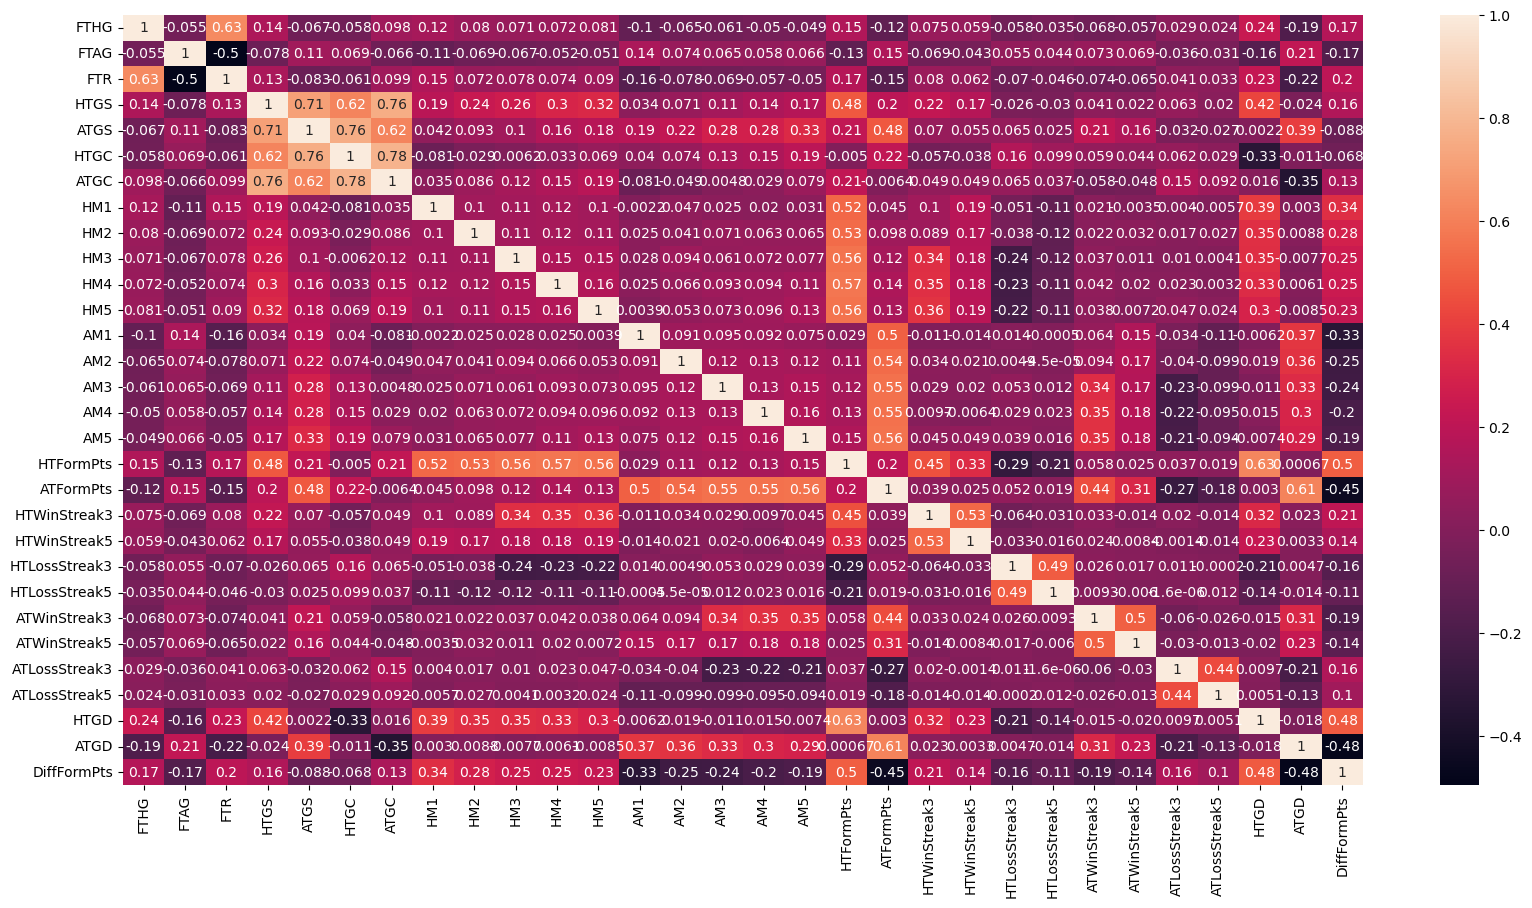

In [11]:
import seaborn as sns

plt.figure(figsize=(20,10)) 
sns.heatmap(df_2018.corr(), annot= True)

In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np

# def fix_year(date_str):
#     day, month, year = date_str.split('/')
#     if int(year) <= 20: 
#         year = '20' + year
#     else:
#         year = '19' + year
#     return f"{day}/{month}/{year}"

# # Convert 'Date' to datetime format (handling two-digit years)
# df_2018['Date'] = df_2018['Date'].apply(fix_year)
# df_2018['Date'] = pd.to_datetime(df_2018['Date'], format='%d/%m/%Y')

# Drop the 'FTR' column
# Drop the 'FTR' column
df_2018 = df_2018.drop(columns=['FTR', 'Date'])

# OneHotEncode 'HomeTeam' and 'AwayTeam'
encoder = OneHotEncoder()

encoded_teams = encoder.fit_transform(df_2018[['HomeTeam', 'AwayTeam']])
df_encoded = pd.DataFrame(encoded_teams.toarray(), columns=encoder.get_feature_names_out())

# Drop 'HomeTeam' and 'AwayTeam' (now encoded) and concatenate the encoded features
df_2018 = pd.concat([df_2018.drop(columns=['HomeTeam', 'AwayTeam']), df_encoded], axis=1)

# Create a new 'Result' column for home team win (1 if home team wins, 0 otherwise)
df_2018['Result'] = np.where(df_2018['FTHG'] > df_2018['FTAG'], 1, 0)

# Define feature columns (everything except 'FTHG', 'FTAG', and 'Result')
features = df_2018.drop(columns=['FTHG', 'FTAG', 'Result'])

# Target labels (home and away goals and match result)
y_home_goals = df_2018['FTHG']
y_away_goals = df_2018['FTAG']
y_result = df_2018['Result']

# Perform a single train-test split for all targets
X_train, X_test, y_home_train, y_home_test, y_away_train, y_away_test, y_result_train, y_result_test = train_test_split(
    features, y_home_goals, y_away_goals, y_result, test_size=0.2, random_state=42
)

# Train linear regression models for home and away goals
home_model = LinearRegression()
home_model.fit(X_train, y_home_train)

away_model = LinearRegression()
away_model.fit(X_train, y_away_train)

# Predict goals for test set
home_goals_pred = home_model.predict(X_test)
away_goals_pred = away_model.predict(X_test)

# Train logistic regression to predict home win probability
log_model = LogisticRegression()
log_model.fit(X_train, y_result_train)

# Predict home win probability
home_win_prob = log_model.predict_proba(X_test)[:, 1]

# Output example of predicted home win probability
print(f"Predicted probability of home team winning: {home_win_prob[0]:.2f}")

Predicted probability of home team winning: 0.75


/Users/mina/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


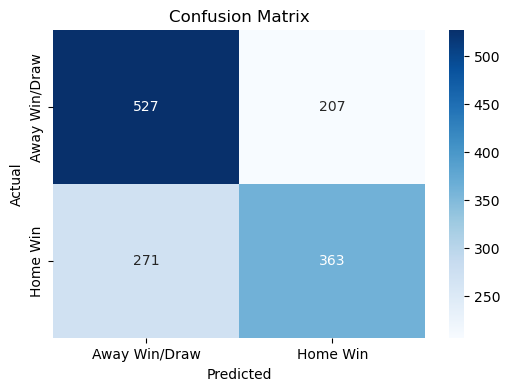

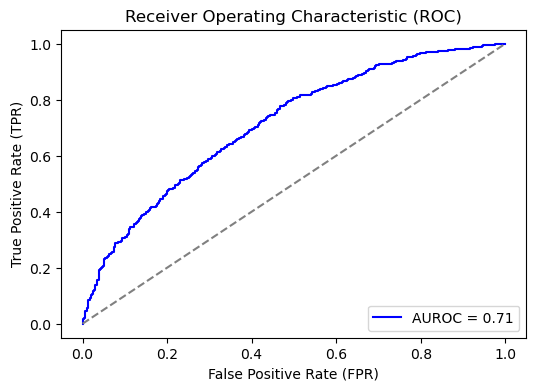

Area Under ROC Curve (AUROC): 0.71


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Predict the result on the test set (home team win/loss)
y_result_pred = log_model.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_result_test, y_result_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Away Win/Draw', 'Home Win'], yticklabels=['Away Win/Draw', 'Home Win'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve and AUROC score
y_result_prob = log_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (home win)

fpr, tpr, thresholds = roc_curve(y_result_test, y_result_prob)
auroc = roc_auc_score(y_result_test, y_result_prob)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'AUROC = {auroc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Dashed diagonal
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()

print(f"Area Under ROC Curve (AUROC): {auroc:.2f}")